In [368]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

In [369]:
years = [2015, 2016, 2017, 2018, 2019]
data_2015 = pd.read_csv(f"WorldHappiness/2015.csv", sep=",")
data_2015.insert(0, "year", 2015, True)
data_2016 = pd.read_csv(f"WorldHappiness/2016.csv", sep=",")
data_2016.insert(0, "year", 2016, True)
data_2017 = pd.read_csv(f"WorldHappiness/2017.csv", sep=",")
data_2017.insert(0, "year", 2017, True)
data_2018 = pd.read_csv(f"WorldHappiness/2018.csv", sep=",")
data_2018.insert(0, "year", 2018, True)
data_2019 = pd.read_csv(f"WorldHappiness/2019.csv", sep=",")
data_2019.insert(0, "year", 2019, True)

In [370]:
print("2015 Data Shape: ",data_2015.shape)
print("2016 Data Shape: ",data_2016.shape)
print("2017 Data Shape: ",data_2017.shape)
print("2018 Data Shape: ",data_2018.shape)
print("2019 Data Shape: ",data_2019.shape)

2015 Data Shape:  (158, 13)
2016 Data Shape:  (157, 14)
2017 Data Shape:  (155, 13)
2018 Data Shape:  (156, 10)
2019 Data Shape:  (156, 10)


In [371]:
sort_2016 = data_2016.sort_values(by="Country")
region_2016 = sort_2016[["Country", "Region"]]
sort_2015 = data_2015.sort_values(by="Country")
region_2015 = sort_2015[["Country", "Region"]]
region = pd.merge(region_2015,region_2016, how="outer")
print("region and country size: ", region.shape)

region and country size:  (164, 2)


In [372]:
data_new_2017 = pd.merge(data_2017, region)
data_new_2018 = pd.merge(data_2018, region, left_on="Country or region", right_on="Country")
data_new_2019 = pd.merge(data_2019, region, left_on="Country or region", right_on="Country")
print("2015 New Data Shape: ",data_2015.shape)
print("2016 New Data Shape: ",data_2016.shape)
print("2017 New Data Shape: ",data_new_2017.shape)
print("2018 New Data Shape: ",data_new_2018.shape)
print("2019 New Data Shape: ",data_new_2019.shape)

2015 New Data Shape:  (158, 13)
2016 New Data Shape:  (157, 14)
2017 New Data Shape:  (153, 14)
2018 New Data Shape:  (154, 12)
2019 New Data Shape:  (152, 12)


In [373]:
cols = ["year","country","region","rank","score","gdp","family","lifeExp","freedom","trust","generosity"]
data = []
for i, row in data_2015.iterrows():
    app = row[["year","Country","Region","Happiness Rank","Happiness Score","Economy (GDP per Capita)", "Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]]
    data.append(app.array)
for i, row in data_2016.iterrows():
    data.append(row[["year","Country","Region","Happiness Rank","Happiness Score","Economy (GDP per Capita)", "Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]].array)
for i, row in data_new_2017.iterrows():
    data.append(row[["year","Country","Region","Happiness.Rank","Happiness.Score","Economy..GDP.per.Capita.","Family", "Health..Life.Expectancy.","Freedom","Trust..Government.Corruption.","Generosity"]].array)
for i, row in data_new_2018.iterrows():
    data.append(row[["year","Country or region","Region","Overall rank","Score","GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption", "Generosity"]].array)
for i, row in data_new_2019.iterrows():
    data.append(row[["year","Country or region","Region","Overall rank","Score","GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption", "Generosity"]].array)
data= pd.DataFrame(data,columns=cols)
data.head()

,year,country,region,rank,score,gdp,family,lifeExp,freedom,trust,generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### Analysis

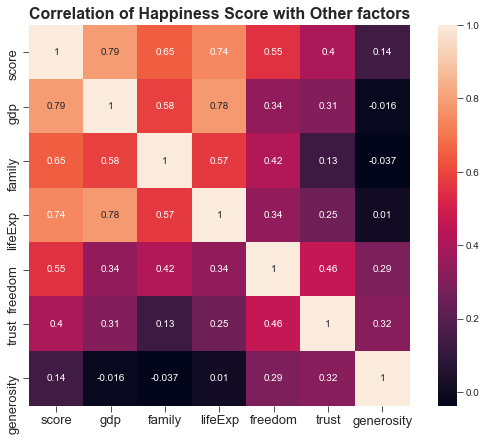

In [374]:
corrMatrix = data[["score","gdp","family","lifeExp","freedom","trust","generosity"]].corr()
plt.figure(figsize = (10, 7))
sns.heatmap(corrMatrix, annot=True, square=True)
plt.title("Correlation of Happiness Score with Other factors", fontweight = "bold", fontsize = 16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("plots/"+"Heatmap Score Overall.png")
plt.show()

<Figure size 864x720 with 0 Axes>

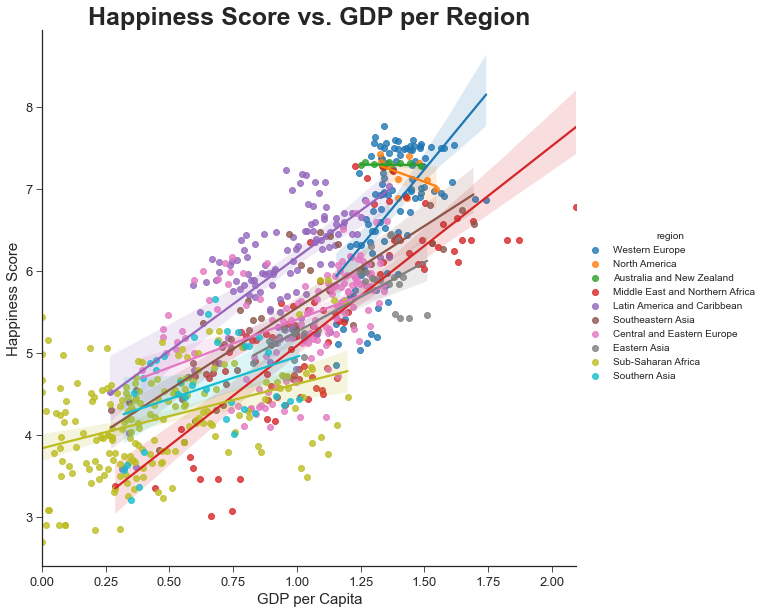

In [385]:
plt.figure(figsize=(12,10))
sns.lmplot(data=data,y="score", x="gdp",hue="region",height = 8)
plt.title("Happiness Score vs. GDP per Region",fontsize=25, fontweight = "bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Happiness Score", fontsize=15)
plt.xlabel("GDP per Capita", fontsize=15)
plt.savefig("plots/"+"scatterplot gdpvs.score.png")
plt.show()

<Figure size 864x720 with 0 Axes>

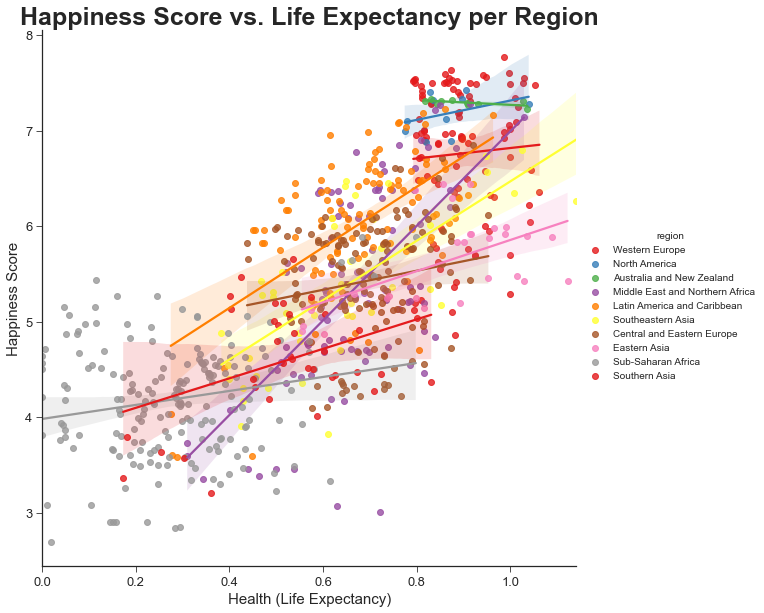

In [386]:
plt.figure(figsize=(12,10))
sns.lmplot(data=data, y="score", x="lifeExp",hue="region",palette="Set1", height=8)
plt.title("Happiness Score vs. Life Expectancy per Region",fontsize=25, fontweight = "bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Happiness Score", fontsize=15)
plt.xlabel("Health (Life Expectancy)", fontsize=15)
plt.savefig("plots/"+"scatterplot lifeExpvs.score.png")
plt.show()

<Figure size 864x720 with 0 Axes>

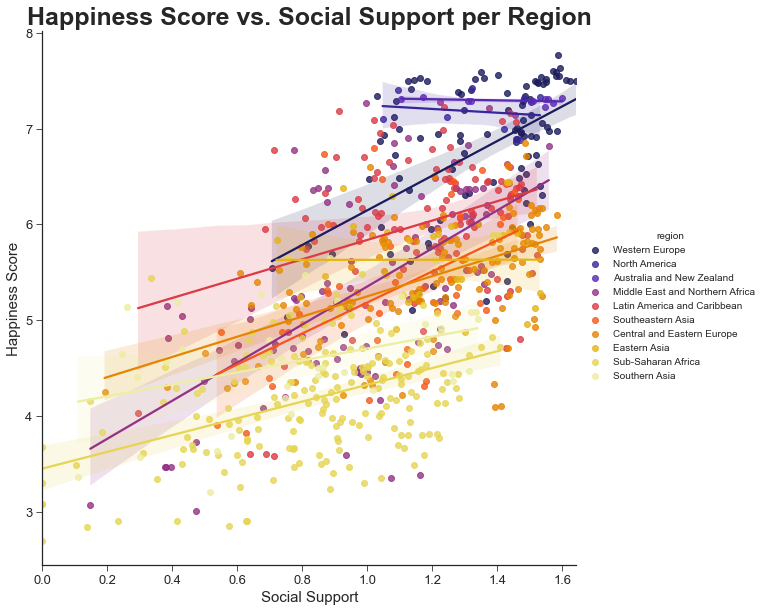

In [389]:
plt.figure(figsize=(12,10))
sns.lmplot(data=data,y="score", x="family",hue="region",palette="CMRmap",height=8)
plt.title("Happiness Score vs. Social Support per Region",fontsize=25, fontweight = "bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Happiness Score", fontsize=15)
plt.xlabel("Social Support", fontsize=15)
plt.savefig("plots/"+"scatterplot familyvs.score.png")
plt.show()

<Figure size 864x720 with 0 Axes>

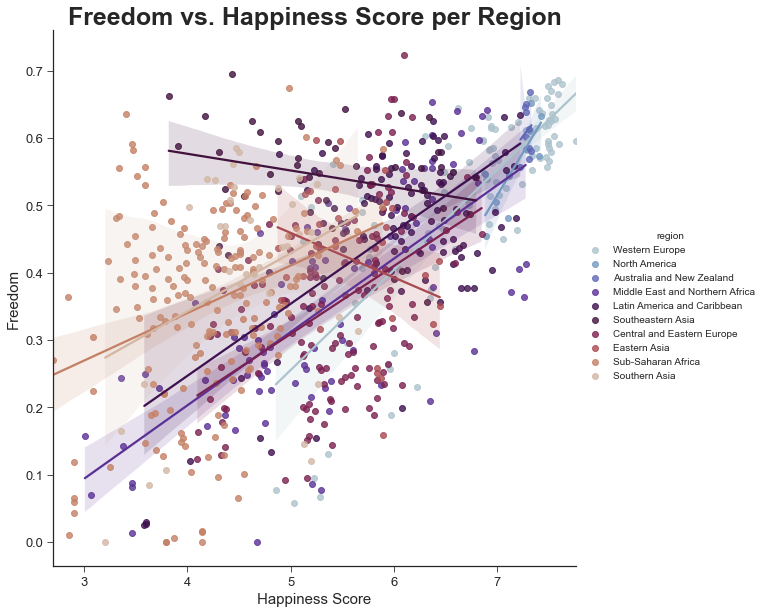

In [391]:
plt.figure(figsize=(12,10))
sns.lmplot(data=data,x="score", y="freedom",hue="region",palette="twilight",height=8)
plt.title("Freedom vs. Happiness Score per Region",fontsize=25, fontweight = "bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Happiness Score", fontsize=15)
plt.ylabel("Freedom", fontsize=15)
plt.savefig("plots/"+"scatterplot freedomvs.score.png")
plt.show()

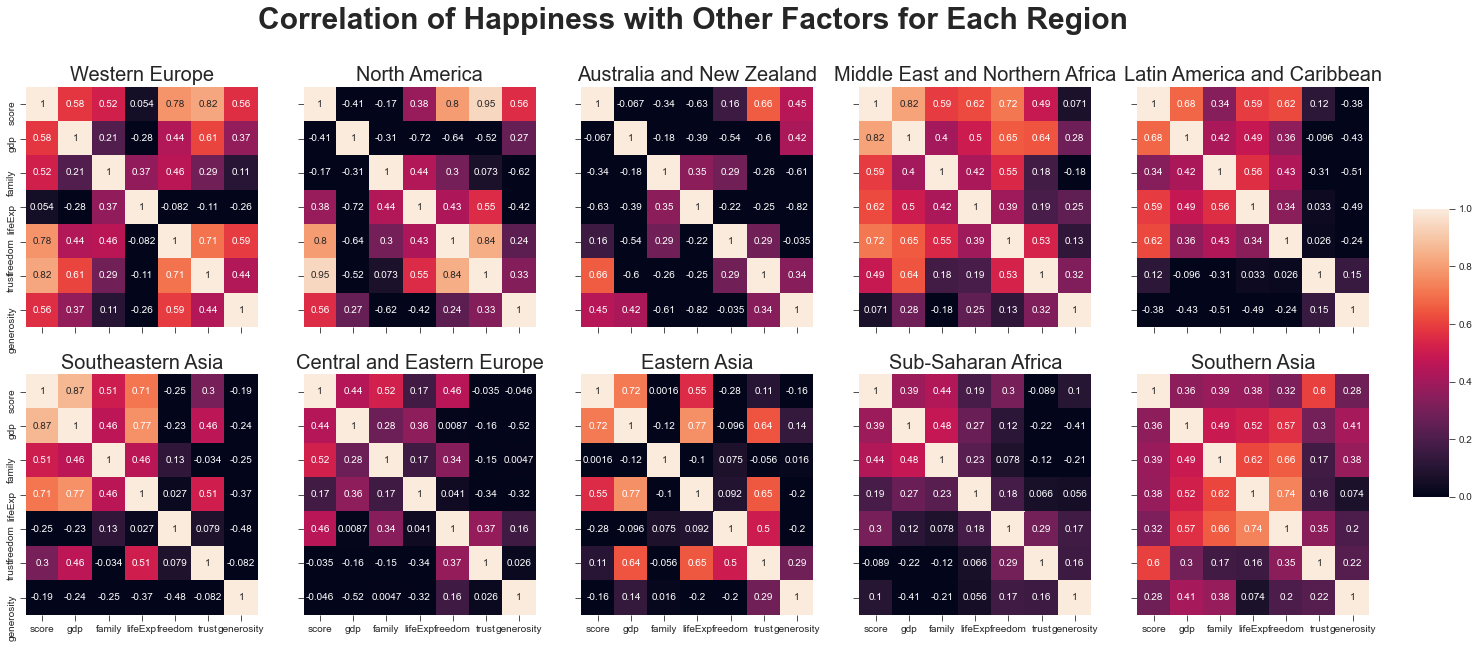

In [332]:
region = data["region"].unique()
fig, ax = plt.subplots(2, 5, figsize = (25, 10), constrained_layout = True, sharey = True, sharex = True)
j = 0
cbar_ax = fig.add_axes([.9, .3, .02, .4])
for i, loc in enumerate(region):
    if i>0 and i%5 == 0:
        j+=1
    corrMatrix = data[data["region"]==loc][["score","gdp","family","lifeExp","freedom","trust","generosity"]].corr()
    sns.heatmap(corrMatrix, cbar=i == 0, ax= ax[j][i%5],vmin=0,annot=True, cbar_ax=None if i else cbar_ax)
    ax[j][i%5].set_title(loc, loc = "center", fontsize = 20, fontweight = 12)
fig.tight_layout(rect=[0, 0, .98, 1])
fig.suptitle("Correlation of Happiness with Other Factors for Each Region", fontsize = 30, fontweight = "bold")
plt.savefig("plots/"+"Heatmap per region.png")
plt.show()

- global tendency: **gdp**>=lifeExp>family>freedom>trust>generosity

- Western Europe: trust>freedom>**gdp**>genrosity>=family>lifeExp

- North America: trust>freedom>generosity>lifeExp>family>**gdp**

- Austraila and New Zealand: trust>generosity>freedom>gdp>family>lifeExp

- Middle East and Northern Africa: **gdp**>=freedom>lifeExp>family>trust>generosity

- Latin America and Caribbean: lifeExp>=**gdp**>=family>trust>generosity

- Southeastern Asia: **gdp**>lifeExp>family>trust>generosity>=freedom

- Central and Eastern Europe: family>=freedom>**gdp**>lifeExp>trust>=generosity

- Eastern Asia: **gdp**>lifeExp>trust>=family>=generosity>=freedom

- Sub-Saharan Africa: family>=**gdp**>=freedom>=generosity>=lifeExp>trust

- Southern Asia: trust>lifeExp>=family>=**gdp**>freedom>=generosity

### Regression Predict

- only using moderate and strong correlation variable

In [392]:
from sklearn import linear_model
linEq = linear_model.LinearRegression()
x = data[["gdp","lifeExp","family","freedom"]]
y = data["score"]
linEq.fit(x,y)
slope = linEq.coef_
intercept = linEq.intercept_

In [393]:
print(slope)
print(intercept)

[1.19848639 1.03837822 0.53361979 1.92751775]
2.280592502262108
